In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import plotly as py
import plotly.graph_objects as go

**Importing csv file and first 5 rows**

In [27]:
df = pd.read_csv("csv-1.csv")
df.head()

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,Apr 23 - May 5,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,Apr 23 - May 5,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,Apr 23 - May 5,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,Apr 23 - May 5,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,Apr 23 - May 5,23.2,21.5,25.0,21.5 - 25.0,NaN


**ANXIETY**

In [28]:
mask = df["Indicator"] == "Symptoms of Anxiety Disorder"
anx_df = df[mask]

anx_df.head()

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range
70,Symptoms of Anxiety Disorder,National Estimate,United States,United States,1,Apr 23 - May 5,30.8,30.0,31.7,30.0 - 31.7,NaN
71,Symptoms of Anxiety Disorder,By Age,United States,18 - 29 years,1,Apr 23 - May 5,40.2,38.1,42.4,38.1 - 42.4,NaN
72,Symptoms of Anxiety Disorder,By Age,United States,30 - 39 years,1,Apr 23 - May 5,34.4,32.6,36.1,32.6 - 36.1,NaN
73,Symptoms of Anxiety Disorder,By Age,United States,40 - 49 years,1,Apr 23 - May 5,34.1,32.1,36.2,32.1 - 36.2,NaN
74,Symptoms of Anxiety Disorder,By Age,United States,50 - 59 years,1,Apr 23 - May 5,31.0,29.0,33.1,29.0 - 33.1,NaN


**ANXIETY by Week**

- *Week*: numeric value indicating which week # it is; total of 7 observed weeks

- *Week Label*: date (month and day) for a certain week

    - Week 1: Apr 23 - May 5
    
    - Week 2: May 7 - May 12
    
    - Week 3: May 14 - May 19
    
    - Week 4: May 21 - May 26
    
    - Week 5: May 28 - June 2
    
    - Week 6: June 4 - June 9
    
    - Week 7: June 11 - June 16

In [29]:
val_anx_week_df = anx_df.groupby("Week Label")["Value"].describe().sort_values("mean", ascending = False)
mean_val = val_anx_week_df[["mean"]]
mean_val = mean_val.reset_index()
mean_val

,Week Label,mean
0,June 11 - June 16,30.571429
1,Apr 23 - May 5,29.842857
2,June 4 - June 9,29.708571
3,May 28 - June 2,29.571429
4,May 7 - May 12,29.211429
5,May 21 - May 26,28.408571
6,May 14 - May 19,27.391429


Text(0.5, 1.0, 'Mean Value by Week')

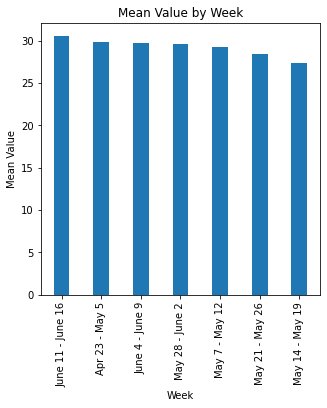

In [30]:
fig = plt.figure(figsize = (5, 5))

plt.bar(mean_val["Week Label"], 
        mean_val["mean"], 
       width = 0.4)

plt.xlabel("Week")

plt.xticks(rotation=90)

plt.ylabel("Mean Value")

plt.title("Mean Value by Week")